In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(pd.__version__)

2.2.3


### Importing CSV

In [4]:
df = pd.read_csv('Tesla_Deaths.csv')

In [5]:
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.shape)
df.info()

(307, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          295 non-null    object 
 6    Deaths                                                               299 non-null    fl

### Dropping irrelevant columns

In [7]:
df = df.drop(columns=['Unnamed: 16','Unnamed: 17'])

In [8]:
df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       ' Source ', ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ',
       ' Deceased 4 '],
      dtype='object')

### Removing white spaces and renaming column names

In [9]:
df.columns = df.columns.str.strip()
df.columns

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
       'Source', 'Note', 'Deceased 1', 'Deceased 2', 'Deceased 3',
       'Deceased 4'],
      dtype='object')

In [10]:
## rename columns

df = df.rename(columns={'Case #':'Case', 'Tesla driver':'Tesla_Driver','Tesla occupant':'Tesla_Occupant','Cyclists/ Peds':'Cyclist_Ped',
               'TSLA+cycl / peds':'Tesla_cyclist_ped','Autopilot claimed':'Autopilot_claimed',
               'Verified Tesla Autopilot Deaths':'Verified_T_autoP_death',
               'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO':'Verified_T_autoP_death_NHTSA',
               'Deceased 1':'Deceased_1','Deceased 2':'Deceased_2','Deceased 3':'Deceased_3','Deceased 4':'Deceased_4','Other vehicle':'Other_vehicle'})

In [11]:
df.columns

Index(['Case', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla_Driver', 'Tesla_Occupant', 'Other_vehicle', 'Cyclist_Ped',
       'Tesla_cyclist_ped', 'Model', 'Autopilot_claimed',
       'Verified_T_autoP_death', 'Verified_T_autoP_death_NHTSA', 'Source',
       'Note', 'Deceased_1', 'Deceased_2', 'Deceased_3', 'Deceased_4'],
      dtype='object')

### Removing duplicate records

In [12]:
print(f'Shape before dropping duplicates: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Shape after dropping duplicates: {df.shape}')

Shape before dropping duplicates: (307, 22)
Shape after dropping duplicates: (303, 22)


In [13]:
df = df[~df['Case'].isnull()]   ## notna()/notnull()/isnull()/isna()

In [14]:
print(df.shape)
df.info()

(294, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Case                          294 non-null    float64
 1   Year                          294 non-null    float64
 2   Date                          294 non-null    object 
 3   Country                       294 non-null    object 
 4   State                         294 non-null    object 
 5   Description                   294 non-null    object 
 6   Deaths                        294 non-null    float64
 7   Tesla_Driver                  289 non-null    object 
 8   Tesla_Occupant                285 non-null    object 
 9   Other_vehicle                 290 non-null    object 
 10  Cyclist_Ped                   291 non-null    object 
 11  Tesla_cyclist_ped             292 non-null    object 
 12  Model                         294 non-null    object 
 13  

In [15]:
col_names = ['Case', 'Year','Deaths','Tesla_Driver','Tesla_Occupant','Other_vehicle','Cyclist_Ped','Tesla_cyclist_ped',
            'Autopilot_claimed','Verified_T_autoP_death','Verified_T_autoP_death_NHTSA']

for col in col_names:
    df[col] = pd.to_numeric(df[col],errors='coerce').astype('Int64')

In [16]:
df.notnull().sum()

Case                            294
Year                            294
Date                            294
Country                         294
State                           294
Description                     294
Deaths                          294
Tesla_Driver                    117
Tesla_Occupant                   43
Other_vehicle                   110
Cyclist_Ped                      44
Tesla_cyclist_ped               181
Model                           294
Autopilot_claimed                35
Verified_T_autoP_death           16
Verified_T_autoP_death_NHTSA     24
Source                          294
Note                              9
Deceased_1                       87
Deceased_2                       17
Deceased_3                        4
Deceased_4                        0
dtype: int64

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

#### Observation: For few records, value in year column doesnt match with the year in date column. Hence dropping the year column and creating it again

In [18]:
df.drop(columns=['Year'], inplace=True)

In [19]:
df.columns

Index(['Case', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla_Driver', 'Tesla_Occupant', 'Other_vehicle', 'Cyclist_Ped',
       'Tesla_cyclist_ped', 'Model', 'Autopilot_claimed',
       'Verified_T_autoP_death', 'Verified_T_autoP_death_NHTSA', 'Source',
       'Note', 'Deceased_1', 'Deceased_2', 'Deceased_3', 'Deceased_4'],
      dtype='object')

In [20]:
df['Year'] = df['Date'].dt.year

In [21]:
df['Month'] = df['Date'].dt.month_name()

In [22]:
df['Day'] = df['Date'].dt.day_name()

In [23]:
x_col = df.columns[df.isnull().sum() > 0]
df[x_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tesla_Driver                  117 non-null    Int64  
 1   Tesla_Occupant                43 non-null     Int64  
 2   Other_vehicle                 110 non-null    Int64  
 3   Cyclist_Ped                   44 non-null     Int64  
 4   Tesla_cyclist_ped             181 non-null    Int64  
 5   Autopilot_claimed             35 non-null     Int64  
 6   Verified_T_autoP_death        16 non-null     Int64  
 7   Verified_T_autoP_death_NHTSA  24 non-null     Int64  
 8   Note                          9 non-null      object 
 9   Deceased_1                    87 non-null     object 
 10  Deceased_2                    17 non-null     object 
 11  Deceased_3                    4 non-null      object 
 12  Deceased_4                    0 non-null      float64
dtypes: Int64(8

In [24]:
for col in ['Tesla_Driver', 'Tesla_Occupant', 'Other_vehicle', 'Cyclist_Ped',
       'Tesla_cyclist_ped', 'Autopilot_claimed', 'Verified_T_autoP_death',
       'Verified_T_autoP_death_NHTSA']:
    df[col] = df[col].fillna(0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Case                          294 non-null    Int64         
 1   Date                          294 non-null    datetime64[ns]
 2   Country                       294 non-null    object        
 3   State                         294 non-null    object        
 4   Description                   294 non-null    object        
 5   Deaths                        294 non-null    Int64         
 6   Tesla_Driver                  294 non-null    Int64         
 7   Tesla_Occupant                294 non-null    Int64         
 8   Other_vehicle                 294 non-null    Int64         
 9   Cyclist_Ped                   294 non-null    Int64         
 10  Tesla_cyclist_ped             294 non-null    Int64         
 11  Model                         294 non

In [26]:
col_list = ['Deceased_1','Deceased_2','Deceased_3','Deceased_4']
for col in col_list:
    df[col] = df[col].fillna(value='Nan')

In [32]:
mode_val = df['Note'].mode()[0]
df['Note'] = df['Note'].fillna(value=mode_val)

In [52]:
df['State'] = df['State'].str.strip()
df['Country'] = df['Country'].str.strip()
df['Note'] = df['Note'].str.strip()

### EDA

In [35]:
import seaborn as sns

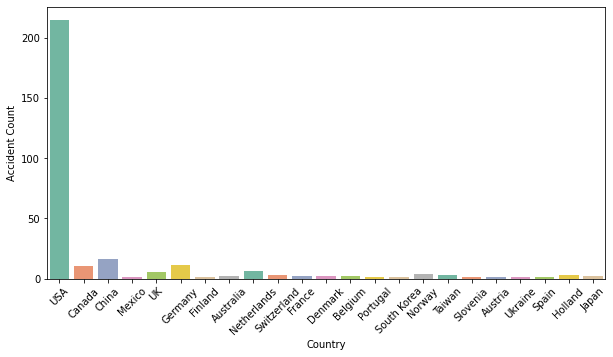

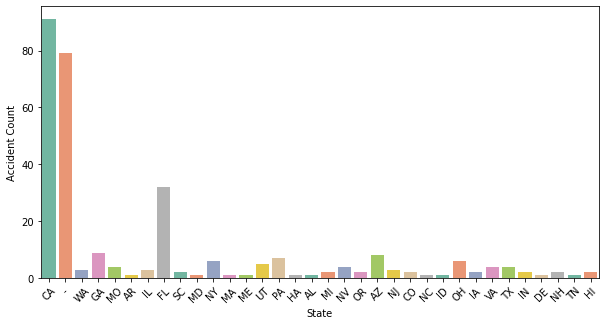

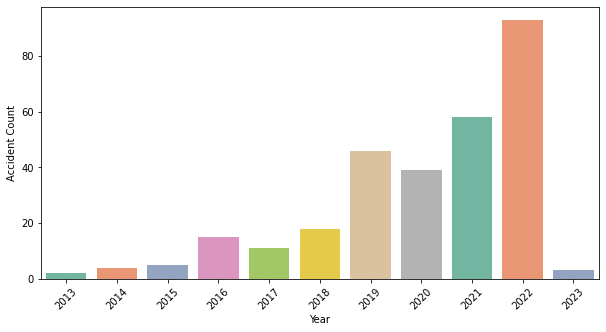

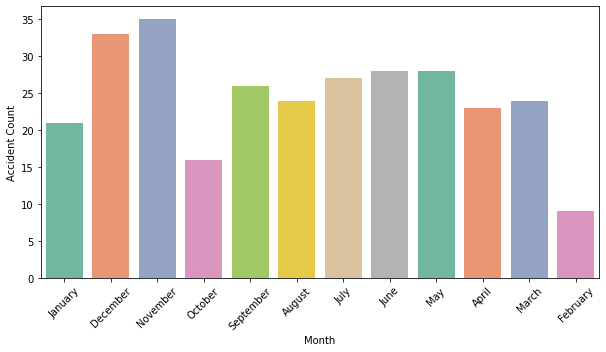

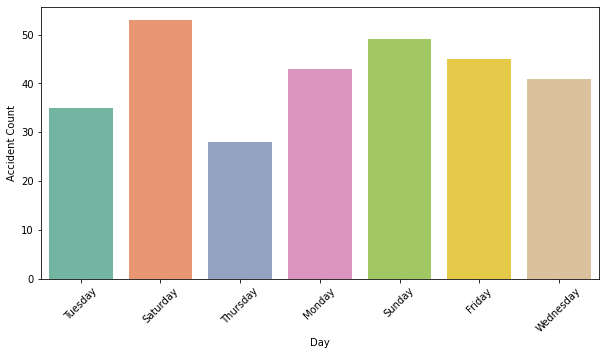

In [53]:
col_names = ['Country','State','Year','Month','Day']

for col in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=col, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(f'{col}')
    plt.ylabel('Accident Count')


In [45]:
df['Date'].min(), df['Date'].max()

(Timestamp('2013-04-02 00:00:00'), Timestamp('2023-01-17 00:00:00'))

#### OBSERVATIONS

Observation period: April'13 to Jan'23

1. During the period, majory of the accidents happened in USA.
2. California is the US state that witnessed the maximum number of accidents.
3. The number of accidents is found to increase of the years although a drop was observed in 2020, which could be due to pandemic lockdown.
4. The number of accidents increased in November and December. This may be related to seasonal factors such as poor weather or increased holiday travel, both of which can raise accident risk. Tesla accidents followed a similar trend.
5. More accidents happened on statudays and sundays.

What is the number of victims (deaths) in each accident?

Text(0.5, 1.0, 'Distribution of Deaths per Accident')

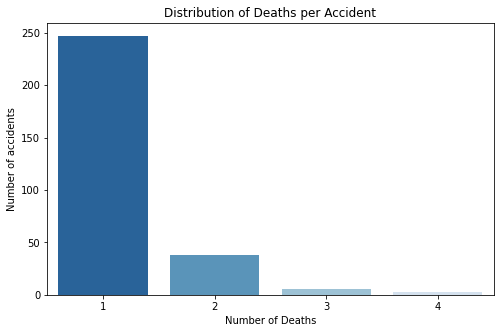

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Deaths',palette='Blues_r')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of accidents')
plt.title('Distribution of Deaths per Accident')

How many times did tesla drivers die?

In [87]:
driver_death = df.groupby('Tesla_Driver')['Case'].count()

In [91]:
driver_death = 100* df.Tesla_Driver.value_counts(normalize=True)
driver_death

Tesla_Driver
0    60.204082
1    39.795918
Name: proportion, dtype: Float64

[Text(0, 0, 'Survived'), Text(1, 0, 'Died')]

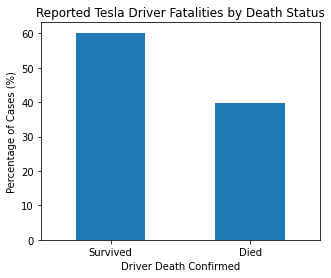

In [93]:
ax = driver_death.plot(kind='bar', figsize=(5,4))
plt.xlabel('Driver Death Confirmed')
plt.title('Reported Tesla Driver Fatalities by Death Status')
plt.ylabel('Percentage of Cases (%)')
ax.set_xticklabels(['Survived','Died'],rotation=0)

What is the proportion of events in which one or more occupants died?

In [97]:
occupant_death = df.Tesla_Occupant.value_counts(normalize=True)
occupant_death

Tesla_Occupant
0     85.37415
1    13.265306
2     1.020408
3     0.340136
Name: proportion, dtype: Float64

Text(0.5, 1.0, 'Occupant deaths Vs Total cases')

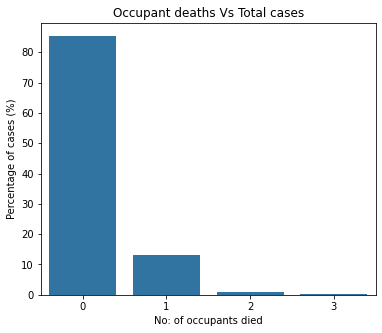

In [104]:
plt.figure(figsize=(6,5))
sns.barplot(data=occupant_death)
plt.xlabel('No: of occupants died')
plt.ylabel('Percentage of cases (%)')
plt.title('Occupant deaths Vs Total cases')

`What is the distribution of events in which the vehicle hit a cyclist or a pedestrian?

In [116]:
ped_cyc = df.Cyclist_Ped.value_counts()
ped_cyc

Cyclist_Ped
0    250
1     42
2      2
Name: count, dtype: Int64

([<matplotlib.patches.Wedge at 0x2ca00b64cd0>,
 [Text(-0.9806403273672749, 0.49834179870948414, ''),
  Text(0.9697668774388349, -0.5191841710053687, ''),
  Text(1.0997487980886085, -0.023507043681869864, '')],
 [Text(-0.5348947240185136, 0.2718227992960822, '85.0'),
  Text(0.5289637513302735, -0.2831913660029283, '14.3'),
  Text(0.5998629807756045, -0.01282202382647447, '0.7')])

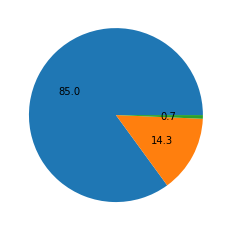

In [145]:
plt.pie(ped_cyc,autopct='%.1f')

How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?

In [125]:
critical_cases = df[((df['Tesla_Occupant'] > 0) | (df['Tesla_Driver'] > 0)) & ((df['Tesla_cyclist_ped']>0) | (df['Cyclist_Ped'] > 0))]

In [128]:
critical_cases.shape[0]

131

What is the frequency of Tesla colliding with other vehicles?

In [191]:
other_vehicle_collision = 100*df.Other_vehicle.value_counts(normalize=True)

In [196]:
other_vehicle_collision_df = other_vehicle_collision.reset_index()

In [197]:
other_vehicle_collision_df

,Other_vehicle,proportion
0,0,62.585034
1,1,32.312925
2,2,3.741497
3,3,1.020408
4,4,0.340136


In [206]:
other_vehicle_collision_df['Collision_otherVehicle'] = other_vehicle_collision_df['Other_vehicle'].apply(lambda x: 0 if x==0 else 1)
other_vehicle_collision_df

,Other_vehicle,proportion,Collision_otherVehicle
0,0,62.585034,0
1,1,32.312925,1
2,2,3.741497,1
3,3,1.020408,1
4,4,0.340136,1


In [210]:
other_vehicle_collision_df.groupby(['Collision_otherVehicle']).agg({'proportion':'sum'}).reset_index()

,Collision_otherVehicle,proportion
0,0,62.585034
1,1,37.414966


Study the event distribution across models

In [141]:
model_event_distribution = 100*df.Model.value_counts(normalize=True)

([<matplotlib.patches.Wedge at 0x2ca7eb1fc40>,
 [Text(-0.39091082888764567, 1.0281968312820138, ''),
  Text(-0.3909099136881574, -1.0281971792318425, ''),
  Text(0.5601480235276475, -0.946696462303557, ''),
  Text(0.9961091620675161, -0.46665462308344385, ''),
  Text(1.0877139535823626, -0.16394619599803506, ''),
  Text(1.099434836319894, -0.03525678213121692, ''),
  Text(1.0999372043616131, -0.011753572272260563, '')],
 [Text(-0.21322408848417035, 0.5608346352447348, '61.6'),
  Text(-0.21322358928444948, -0.5608348250355504, '15.3'),
  Text(0.30553528556053494, -0.5163798885292129, '13.3'),
  Text(0.543332270218645, -0.2545388853182421, '5.8'),
  Text(0.5932985201358341, -0.08942519781711002, '3.4'),
  Text(0.5996917289017603, -0.01923097207157286, '0.3'),
  Text(0.599965747833607, -0.006411039421233034, '0.3')])

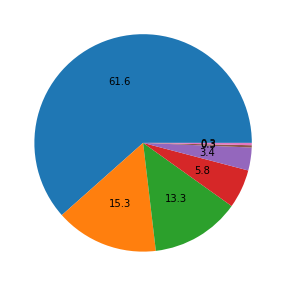

In [147]:
plt.figure(figsize=(10,5))
plt.pie(model_event_distribution,autopct='%.1f')

Check the distribution of verified Tesla autopilot deaths

In [184]:
verified_deaths = 100*df[['Verified_T_autoP_death', 'Verified_T_autoP_death_NHTSA']].value_counts(normalize=True).reset_index()
verified_deaths.sort_values(['proportion'], ascending=False, inplace=True)

In [185]:
verified_deaths

,Verified_T_autoP_death,Verified_T_autoP_death_NHTSA,proportion
0,0,0,91.836735
1,100,100,4.421769
2,0,100,2.721088
3,200,200,1.020408


In [186]:
df.columns

Index(['Case', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla_Driver', 'Tesla_Occupant', 'Other_vehicle', 'Cyclist_Ped',
       'Tesla_cyclist_ped', 'Model', 'Autopilot_claimed',
       'Verified_T_autoP_death', 'Verified_T_autoP_death_NHTSA', 'Source',
       'Note', 'Deceased_1', 'Deceased_2', 'Deceased_3', 'Deceased_4', 'Year',
       'Month', 'Day'],
      dtype='object')

In [188]:
df.Other_vehicle.unique()

<IntegerArray>
[0, 1, 2, 3, 4]
Length: 5, dtype: Int64